<a href="https://colab.research.google.com/github/abi13-ehub/Face_Detection/blob/main/DSR_of_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description: This program gets BTC's daily simple return.


In [ ]:
# Import the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
# load the data 
from google.colab import files 
files.upload()

In [ ]:
# store the data
df = pd.read_csv('BTC-USD.csv')
# set the date as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# show the data 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


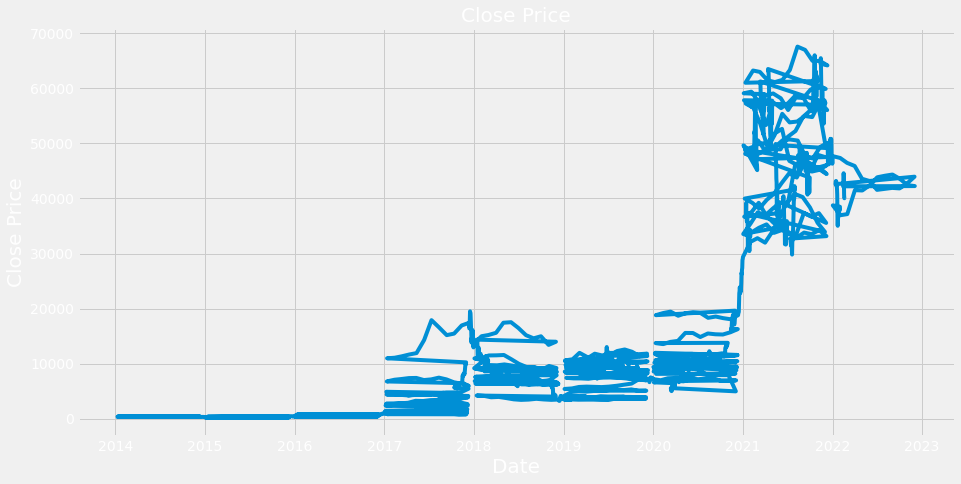

In [ ]:
# visually show and plot the close price 
plt.figure(figsize =(14,7))
plt.title('Close Price',fontsize = 20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price',fontsize =20)
plt.show()

In [ ]:
# calculate and show the daily simple return 
DSR = df['Close'].pct_change()
DSR

2014-09-17         NaN
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
                ...   
2022-02-15    0.046688
2022-02-16   -0.013760
2022-02-17   -0.077882
2022-02-18   -0.012508
2022-02-19    0.002384
Name: Close, Length: 2713, dtype: float64

In [ ]:
# getting statistics on the Daily Simple Return 
DSR.describe()

count    2712.000000
mean        0.002412
std         0.038835
min        -0.371695
25%        -0.013140
50%         0.001996
75%         0.018252
max         0.252472
Name: Close, dtype: float64

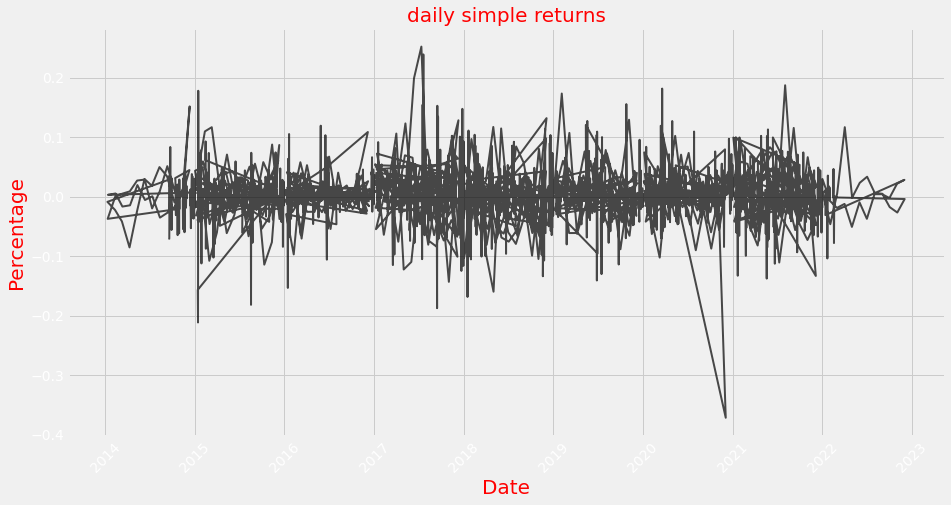

In [ ]:
# visually show and plot the daily simple returns
plt.figure(figsize =(14,7))
plt.title('daily simple returns',fontsize = 20,color = 'red')
plt.plot(DSR.index, DSR, label = 'DSR', lw =2 , alpha = 0.7, color = 'black')
plt.xlabel('Date',fontsize=20, color='red')
plt.ylabel('Percentage',fontsize =20, color ='red')
plt.xticks(rotation = 45)
plt.show()

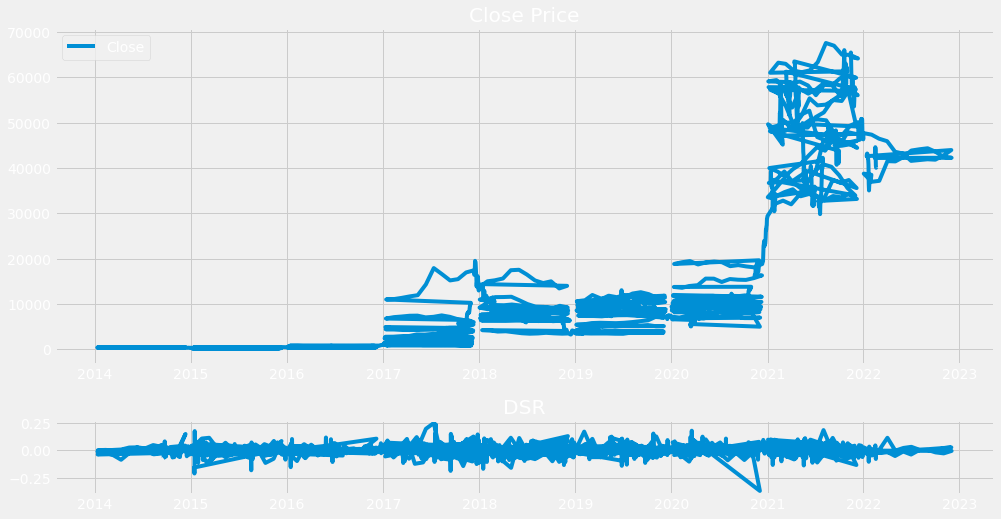

In [ ]:
# put the two charts together 
# first plot the close price
top = plt.subplot2grid((4,4),(0,0),rowspan = 3, colspan = 4)
top.plot(df.index, df['Close'], label = 'Close')
plt.title('Close Price')
plt.legend(loc= 'upper left')

# plot the DSR 
bottom = plt.subplot2grid((4,4),(3,0),rowspan = 1, colspan =4)
plt.title('DSR')
bottom.plot(DSR.index, DSR)
plt.subplots_adjust(hspace = 0.75)
plt.gcf().set_size_inches(15,8)